# Lab: Titanic EDA
---

## Data Dic
---
| Variable | Definition                                 | Key                                            |   |   |
|----------|--------------------------------------------|------------------------------------------------|---|---|
| survival | Survival                                   | 0 = No, 1 = Yes                                |   |   |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |   |   |
| sex      | Sex                                        |                                                |   |   |
| Age      | Age in years                               |                                                |   |   |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |   |   |
| parch    | # of parents / children aboard the Titanic |                                                |   |   |
| ticket   | Ticket number                              |                                                |   |   |
| fare     | Passenger fare                             |                                                |   |   |
| cabin    | Cabin number                               |                                                |   |   |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |   |   |



## Step 1: Reading the data
---

In [2]:
# 1.Import pandas and matplotlib.pyplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

In [11]:
# 2.Load train.csv as a pandas DataFrame.
df = pd.read_csv("./train.csv")

## Step 2: Cleaning the data
---

(891, 12)


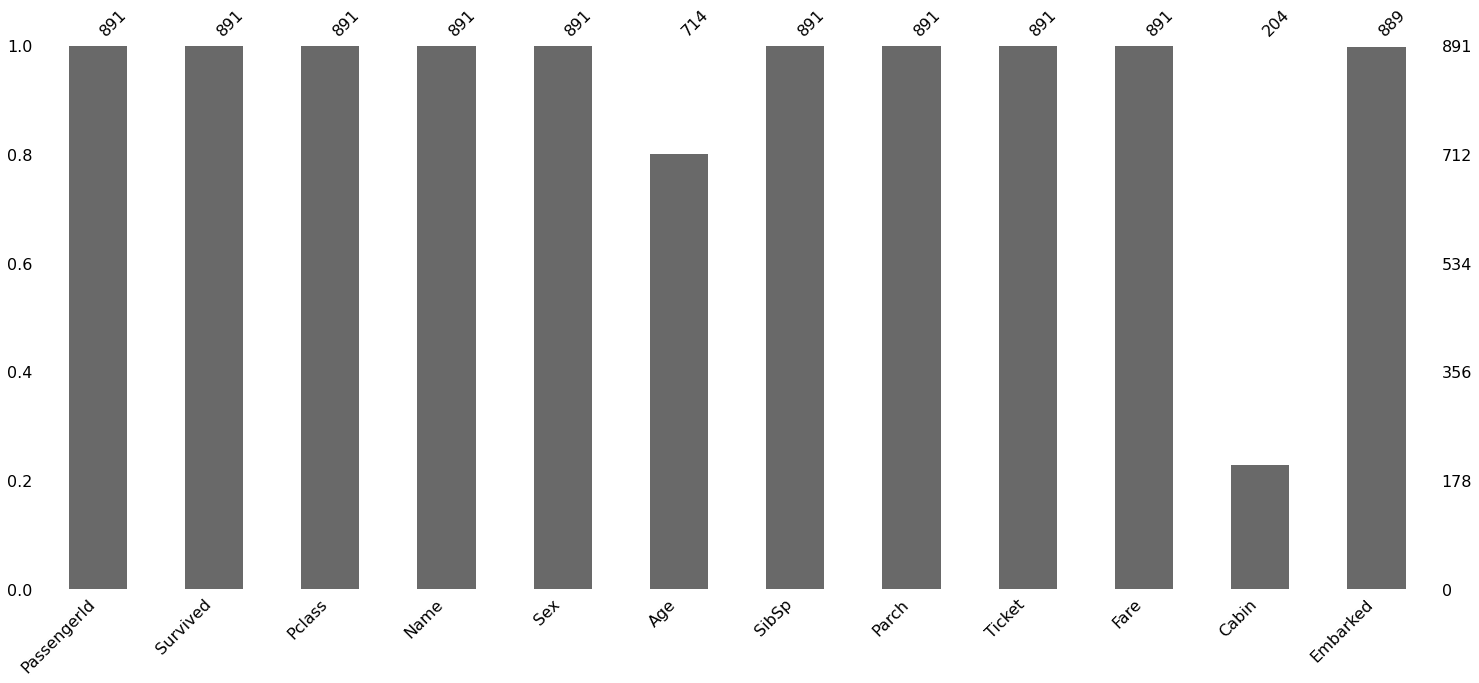

In [4]:
# 1.Create a bar chart showing how many missing values are in each column

print(df.shape)
msno.bar(df);

In [5]:
# 2.Which column has the most NaN values? How many cells in that column are empty?

df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

In [25]:
df.shape

(891, 35)

In [28]:
# 3.Delete all rows where Embarked is empty

df.dropna(subset=['Embarked'], inplace=True)
df.shape

(889, 35)

In [31]:
# 4.Fill all empty cabins with ¯\(ツ)/¯

df.fillna(value={"Cabin": "¯\(ツ)/¯"}, inplace=True)

## Step 3: Feature extraction
---

In [35]:
# 1.There are two columns that pertain to how many family members are on the boat for a given person. 
# Create a new column called FamilyCount which will be the sum of those two columns.

df['FamilyCount'] = df['SibSp'] + df['Parch']

In [17]:
# BONUS: Extract the title from everyone's name and create dummy columns.

df['title_name'] = df['Name'].apply(lambda name : name[name.find(',') + 2 : name.find('.')])
df = df.merge(pd.get_dummies(df['title_name'], prefix='title'), left_index=True, right_index=True)

In [50]:
# 2.Reverends have a special title in their name. Create a column called 
# IsReverend: 1 if they're a preacher, 0 if they're not.

df['IsReverend'] = (df['title_name'] == 'Rev').astype(int)

In [5]:
# 3.In order to feed our training data into a classification algorithm
# , we need to convert our categories into 1's and 0's using pd.get_dummies.

In [14]:
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
# These columns will have 1's and 0's that correspond 
# to the C, Q and S values in the Embarked column.

df = df.merge(pd.get_dummies(df['Embarked'], prefix='Embarked'), left_index=True, right_index=True)

In [15]:
# Do the same thing for Sex.

df = df.merge(pd.get_dummies(df['Sex'], prefix='Sex'), left_index=True, right_index=True)

## Step 4: Exploratory analysis
---

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,0,0,0


In [54]:
# 1.What was the survival rate overall?

df['Survived'].mean()

0.38245219347581555

In [57]:
# 2.Which gender fared the worst? What was their survival rate?
# Male.

df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [58]:
# 3.What was the survival rate for each Pclass?

df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [59]:
# 4.Did any reverends survive? How many?
# No reverend survived.

df.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

In [61]:
# 5.What is the survival rate for cabins marked ¯\(ツ)/¯

df[df['Cabin']=='¯\(ツ)/¯']['Survived'].mean()

0.29985443959243085

In [63]:
# 6.What is the survival rate for people whose Age is empty?

df[df['Age'].isnull()]['Survived'].mean()

0.2937853107344633

In [64]:
# 7.What is the survival rate for each port of embarkation?

df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [73]:
# 8.What is the survival rate for children (under 12) in each Pclass?

df[df['Age'] < 12].groupby('Pclass')['Survived'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,4,0.750000
2,17,1.000000
3,47,0.404255


In [80]:
# 9. Did the captain of the ship survive? Is he on the list?
# Captain name: Edward John Smith.
# He isn't on the list. After seaching the captain history, he did not survive.

df[df['Name'].str.find('Edward') >= 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,FamilyCount,IsReverend
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,...,0,0,1,0,0,0,0,0,0,0
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,...,0,0,0,0,0,0,0,0,2,0
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,...,0,0,1,0,0,0,0,0,0,0
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,...,0,0,1,0,0,0,0,0,1,0
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,...,0,0,1,0,0,0,0,0,0,0
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,...,0,0,1,0,0,0,0,0,0,0
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,...,0,0,1,0,0,0,0,0,1,0
546,547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,2908,26.0000,...,0,0,0,1,0,0,0,0,1,0
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,...,0,0,0,1,0,0,0,0,2,0
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# 10.Of all the people that died, who had the most expensive ticket? How much did it cost?
# Fortune, Mr. Charles Alexander and Fortune, Mr. Mark. The ticked costed 263.0.

df[(df['Survived']==0) & (df['Fare']==df[df['Survived'] == 0]['Fare'].sort_values(ascending=False).iloc[0])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,...,0,0,1,0,0,0,0,0,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,...,0,0,1,0,0,0,0,0,5,0


In [94]:
# 11.Does having family on the boat help or hurt your chances of survival?
# Having family can help to increase chances of suvival if the family size is around 1-3 persons.

df.groupby('FamilyCount')['Survived'].agg(['count', 'mean'])

,count,mean
FamilyCount,,
0,535,0.300935
1,161,0.552795
2,102,0.578431
3,29,0.724138
4,15,0.200000
5,22,0.136364
6,12,0.333333
7,6,0.000000
10,7,0.000000


## Step 5: Plotting
---

In [111]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,0,0,0


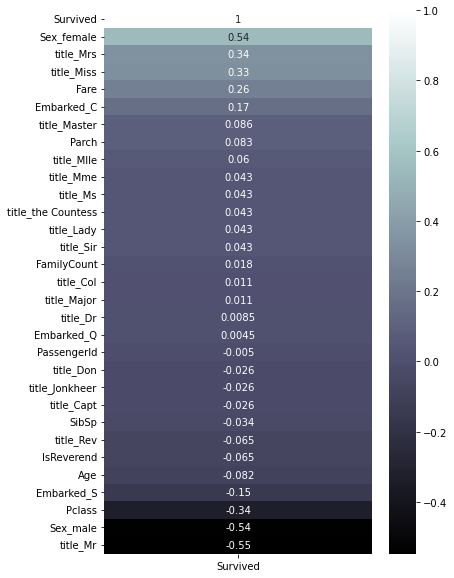

In [162]:
# Plot correlation with survival rate.

corr = df.corr()[['Survived']].sort_values(by ='Survived', ascending=False)

plt.figure(figsize=(6,10))
sns.heatmap(corr, cmap='bone', annot=True);


### Gender
---

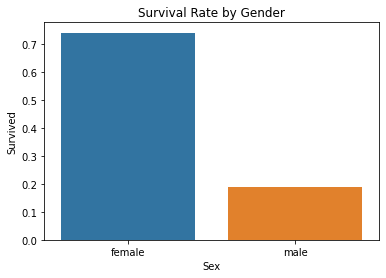

In [183]:
# Plot survival rate by gender.

mean = df.groupby('Sex')[['Survived']].mean().reset_index()

sns.barplot(x='Sex', y='Survived', data=mean)
plt.title('Survival Rate by Gender');

### Embarkation
---

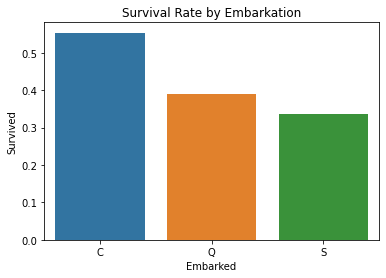

In [197]:
# Plot survival rate by embarkation.

mean = df.groupby('Embarked')[['Survived']].mean().reset_index()

sns.barplot(x='Embarked', y='Survived', data=mean)
plt.title('Survival Rate by Embarkation');

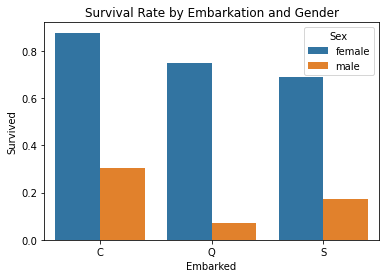

In [198]:
# Plot survival rate by embarkation and gender. 

mean = df.groupby(['Embarked', 'Sex'])[['Survived']].mean().reset_index()

sns.barplot(x='Embarked', y='Survived', hue='Sex', data=mean)
plt.title('Survival Rate by Embarkation and Gender');

For overall embarkation, embarkation at Cherbourg had greater chance to survive 
but for male passengers, embarkation at  Queenstown had the least chance to survive.

### Pclass
---

In [209]:
df.groupby(['Pclass','Embarked', 'Sex'])[['Survived']].agg(['count', 'mean'])

Survived          
                          count      mean
Pclass Embarked Sex                      
1      C        female       43  0.976744
                male         42  0.404762
       Q        female        1  1.000000
                male          1  0.000000
       S        female       48  0.958333
                male         79  0.354430
2      C        female        7  1.000000
                male         10  0.200000
       Q        female        2  1.000000
                male          1  0.000000
       S        female       67  0.910448
                male         97  0.154639
3      C        female       23  0.652174
                male         43  0.232558
       Q        female       33  0.727273
                male         39  0.076923
       S        female       88  0.375000
                male        265  0.128302

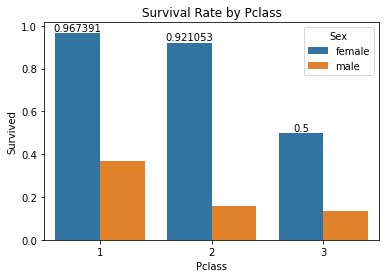

In [211]:
mean = df.groupby(['Pclass', 'Sex'])[['Survived']].mean().reset_index()

ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=mean)
ax.bar_label(ax.containers[0])
plt.title('Survival Rate by Pclass');

Female passengers had more than 90% chance to survive when they bought 1st or 2nd class ticket but for 3rd class ticket the chace dropped to 50%.

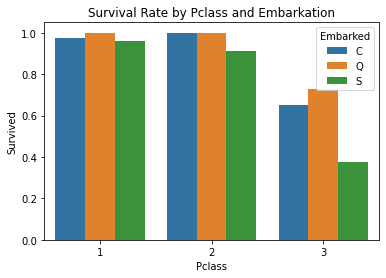

In [219]:
mean = df[df['Sex']=='female'].groupby(['Pclass', 'Embarked'])[['Survived']].mean().reset_index()
ax = sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=mean)
plt.title('Survival Rate by Pclass and Embarkation');

Female passengers who embarked at Southampton and bought 3rd class ticket had the least survival chance among all female passengers.

### Family size
---

In [220]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,0,0,0,0,0


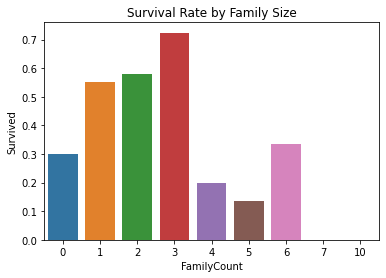

In [238]:
mean = df.groupby(['FamilyCount'])[['Survived']].mean().reset_index()

ax = sns.barplot(x='FamilyCount', y='Survived', data=mean)
plt.title('Survival Rate by Family Size');

347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
2683                1
SOTON/O2 3101287    1
11774               1
392092              1
370376              1
Name: Ticket, Length: 680, dtype: int64